In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ucimlrepo import fetch_ucirepo
auto_mpg = fetch_ucirepo(id=9)
#x = auto_mpg.data.features # X featureların yer aldığı değişken
#y = auto_mpg.data.targets #y target değişkenimiz olan mpga'nın yer aldığı değişken

# sonradan ekliyorum bunu merak ettim heatmapte.
df = auto_mpg.data.original

In [ ]:
display(x.head())
display(y.head())


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
display(x.describe().T)
display(y.describe())

,count,mean,std,min,25%,50%,75%,max
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


2.Eksik değerlerin işlenmesi

horsepowerda eksik veri var. Meanle doldurucam. STD sapması muazzam büyük değil. max değer de çok yüksek değil. Bir de mean ve medyan değerleri çok yakın

In [ ]:
#x['horsepower'] = x['horsepower'].fillna(x['horsepower'].mean())
#x.info()

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


3. Veri Dönüşümleri

Aslında origin özelliği kategorik. Çünkü sadece 3 tane çeşidi var. Continuous değil.

In [ ]:
#encoded_data = pd.get_dummies(x, columns=["origin"], prefix="origin")

# öncelikle car_name'in regresyonda bir önemi olmadığı için ben o sütunu silicem. Çok önemli olsaydı encode edicektim sayısı yoğun olana göre

df = df.drop('car_name', axis=1)
df.head()

# bunu sonradan df olarak deniyorum. veriyi bölmeden
encoded_data = pd.get_dummies(df, columns=["origin"], prefix=["origin"])

print("\nOne-Hot Encoding Sonrası:")
print(encoded_data)


One-Hot Encoding Sonrası:
     cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
394          4          97.0        52.0    2130          24.6          82   
395          4         135.0        84.0    2295          11.6          82   
396          4         120.0        79.0    2625          18.6          82   
397          4         119.0        82.0    2720          19.4          82   

      mpg  origin_1  origin_2  origi

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


Şimdi, ölçekleme için normal dağılıyor mu dağılmıyor mu diye baksın. Ona göre ölçekleme yöntemini bulsun. Bunun için shapiro test uygulayabilirim.

In [ ]:
from scipy.stats import shapiro
normal_dagilan = []
normal_dagilmayan = []

for eachcol in x:
    stat, p = shapiro(x[eachcol])
    print(f'{eachcol} sütununun test istatistiği: {stat} ')
    print(f'{eachcol} sütununun p-değeri: {p}')

    # p-değeri 0.05'ten büyükse normal dağılım varsayılır
    if p > 0.05:
        print('Veriler normal dağılıma uyuyor.')
        normal_dagilan.append(eachcol)

    else:
        print('Veriler normal dağılıma uymuyor.')
        normal_dagilmayan.append(eachcol)


print(f"Normal dağılımı olan sütunlar: {normal_dagilan}\nNormal dağılımı olmayan sütunlar: {normal_dagilmayan}")

displacement sütununun test istatistiği: 0.8804189426889626 
displacement sütununun p-değeri: 5.143160627172132e-17
Veriler normal dağılıma uymuyor.
cylinders sütununun test istatistiği: 0.7487293777258881 
cylinders sütununun p-değeri: 3.8314955862059374e-24
Veriler normal dağılıma uymuyor.
horsepower sütununun test istatistiği: 0.9051280944474029 
horsepower sütununun p-değeri: 4.565951886369039e-15
Veriler normal dağılıma uymuyor.
weight sütununun test istatistiği: 0.9413595163675316 
weight sütununun p-değeri: 1.9702505608681832e-11
Veriler normal dağılıma uymuyor.
acceleration sütununun test istatistiği: 0.9923786617732914 
acceleration sütununun p-değeri: 0.03986944421633885
Veriler normal dağılıma uymuyor.
model_year sütununun test istatistiği: 0.9458510376482036 
model_year sütununun p-değeri: 6.961580786911914e-11
Veriler normal dağılıma uymuyor.
origin sütununun test istatistiği: 0.6739071245015928 
origin sütununun p-değeri: 5.7969462391323954e-27
Veriler normal dağılıma uym

In [ ]:
#yine hiçbir değişkenimiz normal dağılmadı. o halde min-max uygulayacağım. Ama split ettikten sonra.

#from sklearn.preprocessing import MinMaxScaler

#for eachcol in normal_dagilmayan:
    #for döngüsü sayesinde bir listenin elemanları üzerinde işlem yapabiliyorum.


#    scaler = MinMaxScaler()
#    minmax_scaled = scaler.fit_transform(x[[eachcol]])
 #   minmax_df = pd.DataFrame(minmax_scaled, columns=x[[eachcol]].columns)
  #  print("Min-Max Ölçeklenmiş Veri:")
   # print(minmax_df)


#x.head()

Burada standartlaştırma yapmıcam. çünkü verinin orijinalinde x, y diye ayrılmış olsa da henüz kırmadık veriyi. xtrain xtest diye.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

x = encoded_data.drop('mpg', axis=1)
y = encoded_data['mpg']

#1. Öncelikle datayı split ediyorum train ve test olarak
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#boyut yazdırma
print("Eğitim Seti Boyutu:", x_train.shape)
print("Test Seti Boyutu:", x_test.shape)

#ben bi min-max standartlaştırma yapayım
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



# 2. Lineer Regresyon Modeli Oluşturma
model = LinearRegression()

#3. Modeli Eğitme
model.fit(x_train, y_train)

# 4. Test Seti ile Tahmin Yapma
y_pred = model.predict(x_test)

# 5. Model Performansını Değerlendirme (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. sonuçlarını ekrana yazdırma
print(f"\n{model} Performans Metrikleri:")
print("-------------------------------------")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"R² Score (R-squared): {r2:.4f}")
print("-------------------------------------")
# bu arada toplu içeri bir tab kaydırmayı öğrendim."Shift+tab". Toplu bir tab kaydırma ise seçip "tab"
# iki noktadan sonra konulan .4f .dan sonra sadece 4 basamak olsun demekmiş.

Eğitim Seti Boyutu: (318, 9)
Test Seti Boyutu: (80, 9)

LinearRegression() Performans Metrikleri:
-------------------------------------
MSE (Mean Squared Error): 8.3391
MAE (Mean Absolute Error): 2.2876
R² Score (R-squared): 0.8449
-------------------------------------


Bu arada ilk başta veriyi split etmeden standartlaştırmıştım. R2 daha yüksek gelmişti. ama şu an split ettikten sonra standartlaştırdım. R2 biraz düştü normal olarak.

R² Score'u 1'e yakın. Modelin test veri setindeki hedef değişkenin yaklaşık %85'ini doğru bir şekilde açıklayabildiğini gösteriyor.

MAE ve MSE arasında muazzam bir fark yok. Yani hata oranı da düşük. Ama overfit var mı diye şüphelendim.

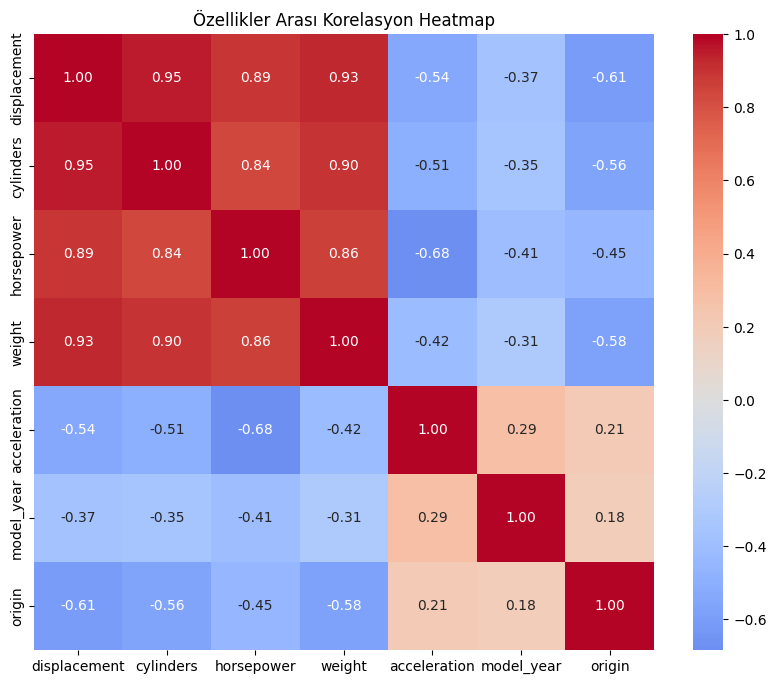

In [ ]:
# Yukarıda veriye df adı verdim. ayrılmamış halini görmek için ve ölçekleme yapmadım. sadece korelasyonu görmek istiyorum.

corr_matrix = x.corr()

# Heatmap oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Özellikler Arası Korelasyon Heatmap')
plt.show()

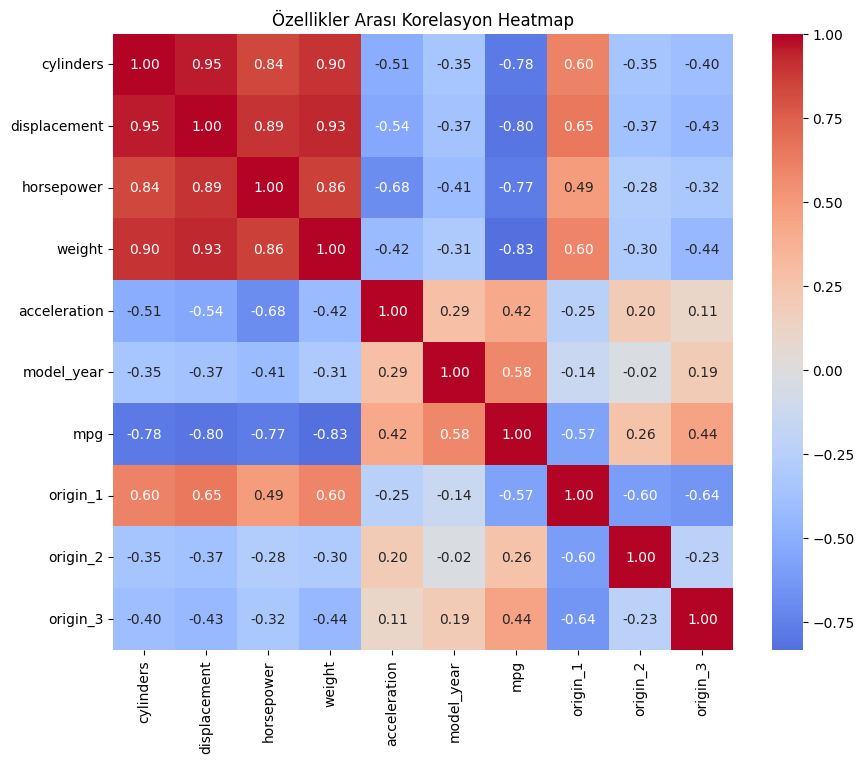

In [ ]:

# x ve y arasındaki korelasyonu da görmek istiyorum
corr_matrix = encoded_data.corr()

# Heatmap oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Özellikler Arası Korelasyon Heatmap')
plt.show()

cylinder, displacement, horsepower, weight arasında çok kuvvetli bir ilişki görülüyor. VIF ya da ridge/lasso yapıcam.

Öncesinde silindiri çıkarıcam. Çünkü zaten displacementı hesaplamak için kullanılıyor.

In [ ]:
encoded_data = encoded_data.drop('cylinders', axis=1)

In [ ]:
encoded_data.head()

,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3
0,307.0,130.0,3504,12.0,70,18.0,True,False,False
1,350.0,165.0,3693,11.5,70,15.0,True,False,False
2,318.0,150.0,3436,11.0,70,18.0,True,False,False
3,304.0,150.0,3433,12.0,70,16.0,True,False,False
4,302.0,140.0,3449,10.5,70,17.0,True,False,False


Yüksek ağırlık MPG'yi düşürüyormuş. Weight'i silemem. Yeni bir özellik ekleyeceğim.

In [ ]:
# ters orantılı oldukları için bölmek mantıklı.
encoded_data['mpg_per_weight'] = encoded_data['mpg'] / encoded_data['weight']

# kg arttıkça mpg ddüşüyor. yani bir galon ile gidilebilecek mil uzunluğu
encoded_data.head()

,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3,mpg_per_weight
0,307.0,130.0,3504,12.0,70,18.0,True,False,False,0.005137
1,350.0,165.0,3693,11.5,70,15.0,True,False,False,0.004062
2,318.0,150.0,3436,11.0,70,18.0,True,False,False,0.005239
3,304.0,150.0,3433,12.0,70,16.0,True,False,False,0.004661
4,302.0,140.0,3449,10.5,70,17.0,True,False,False,0.004929


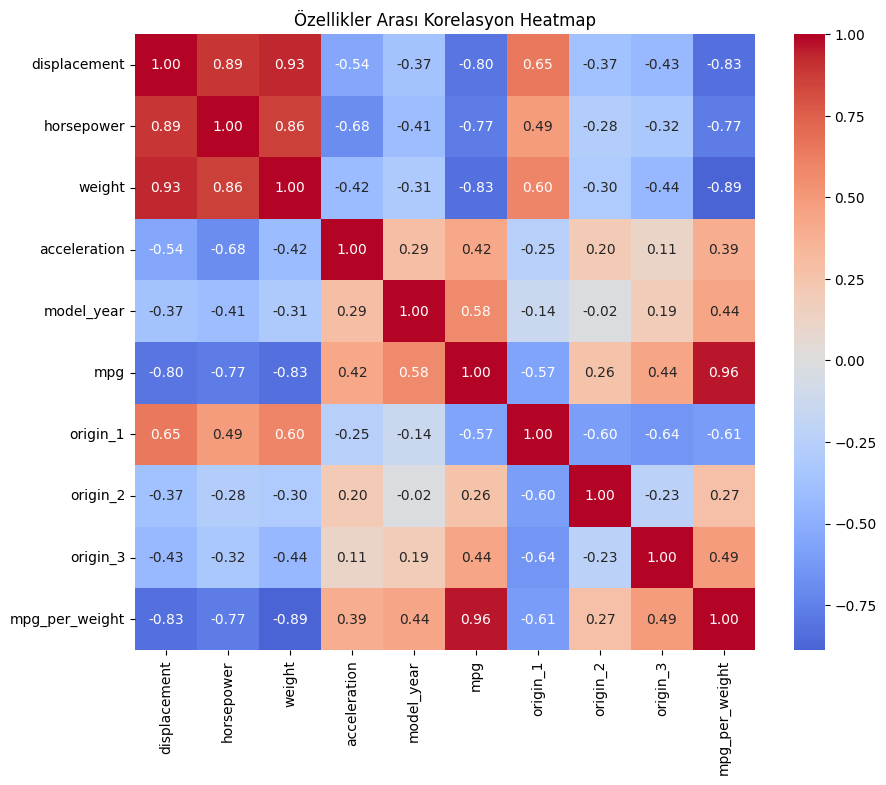

In [ ]:
corr_matrix = encoded_data.corr()

# Heatmap oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Özellikler Arası Korelasyon Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


x = encoded_data.drop('mpg', axis=1)
y = encoded_data['mpg']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Veri ölçeklendirme (standardizasyon)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


#ölçeklendiklerini görmek istedim
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_train_scaled.head()

# Model oluşturma
lr_model = LinearRegression()

# Modeli eğitme
lr_model.fit(x_train_scaled, y_train)

# Test seti ile tahmin yapma
y_pred = lr_model.predict(x_test_scaled)

# Performans değerlendirme
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdıralım
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 1.182495455932889
MSE: 2.088582984788639
R²: 0.9611545261483164


R2 çok yükseldi. hata oranı düştü. Lakin model overfit mi oldu emin olamadım. Yukarıda ölçeklenmiş veriyle eğitmedim modeli. Onun etkisi olabilir. Ama öyle olsaydı daha yüksek olurdu sonuç . Weight modeli domine edeceğinden.

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-validation RMSE scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean():.4f}")

# Tüm eğitim verisiyle modeli eğit, test verisinde performansa bak
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test set RMSE: {test_rmse:.4f}")

# Overfitting kontrolü
if test_rmse > cv_rmse_scores.mean() + 5:  # eşik sana bağlı, burada ±5 birim örnek
    print("⚠️ Muhtemelen overfitting var.")
elif test_rmse < cv_rmse_scores.mean() - 5:
    print("📈 Muhtemelen underfitting yok, test performansı beklenenden iyi.")
else:
    print("✅ Modelin genelleme performansı iyi görünüyor.")

Cross-validation RMSE scores: [1.61339907 1.81735445 1.64693861 1.7945664  1.60425361]
Mean CV RMSE: 1.6953
Test set RMSE: 1.4452
✅ Modelin genelleme performansı iyi görünüyor.


bi model eğitmişim olayyy.  cross_val_score metodu ile bir skor değişkeni oluşturuyorum. mse ve rmse değerleri yakın

In [ ]:
from joblib import dump

# Modeli kaydet
dump(lr_model,'/content/drive/MyDrive/Colab Notebooks/Acunmedya/7.hafta/ML_7week.joblib')

print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!


In [ ]:
!pip install streamlit joblib scikit-learn

streamlit ile de arayüz oluşturmaya çalıştım bilgisayar terminalinden. web sayfası açıldı ama githubla bağlamadığım için streamliti devam etmedim. diğer ödevde bir daha denicem.

In [ ]:
import streamlit as st
import numpy as np
import joblib

# Modeli yükle
model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Acunmedya/7.hafta/ML_7week.joblib')

# Sayfa başlığı
st.title("Lineer Regresyon Tahmin Uygulaması")

# Girdi alanları (örnek 4 özellikli veri için)
st.write("Lütfen model için gerekli özellikleri girin:")
feature_1 = st.number_input("Özellik 1", value=320.0)
feature_2 = st.number_input("Özellik 2", value=190.0)
feature_3 = st.number_input("Özellik 3", value=10.0)
feature_4 = st.number_input("Özellik 4", value=80.0)

# Tahmin butonu
if st.button("Tahmin Et"):
    # Girdileri numpy array'e dönüştür
    input_data = np.array([[feature_1, feature_2, feature_3, feature_4]])

    # Tahmini yap
    prediction = model.predict(input_data)

    # Sonucu göster
    st.success(f"Tahmin Edilen Değer: {prediction[0]:.2f}")

2025-04-07 16:20:13.379 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.542 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-07 16:20:14.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-07 16:20:14.573 Thread 'MainThread': mi